In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

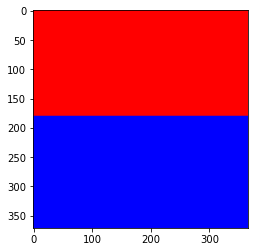

In [12]:
img = cv2.imread(filename='red_blue.jpg')
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
plt.imshow(X=img);

In [13]:
img.shape

(371, 366, 3)

In [15]:
img_hist = cv2.calcHist(images=img, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
print(img_hist.shape)

(256, 1)


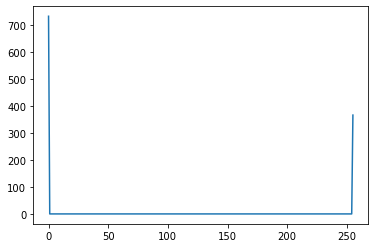

In [16]:
plt.plot(img_hist);

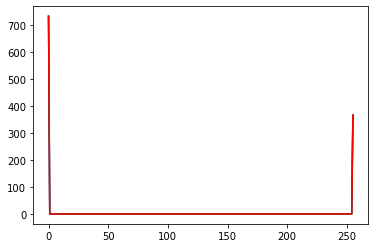

In [20]:
color = ('b', 'g', 'r')
plt.figure()
for i, c in enumerate(color):
    hist = cv2.calcHist(images=img, channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist, color=c);

(2448, 3264, 3)

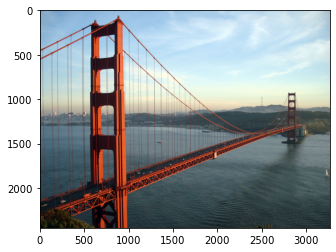

In [21]:
golden_gate = cv2.imread(filename='goldenGate.jpg')
golden_gate_vis = cv2.cvtColor(src=golden_gate, code=cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(X=golden_gate_vis)
golden_gate.shape

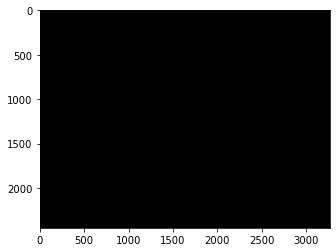

In [24]:
mask = np.zeros(golden_gate.shape[:2], np.uint8)
plt.figure(), plt.imshow(X=mask, cmap='gray');

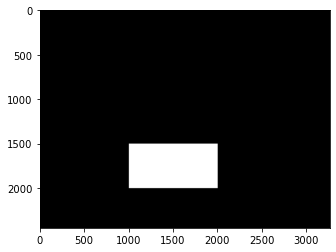

In [27]:
mask[1500:2000, 1000:2000] = 255
plt.figure(), plt.imshow(X=mask, cmap='gray');

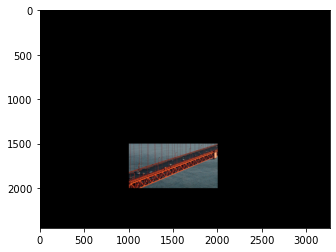

In [29]:
masked_img_vis = cv2.bitwise_and(src1=golden_gate_vis, src2=golden_gate_vis, mask=mask)
plt.figure(), plt.imshow(X=masked_img_vis, cmap='gray');

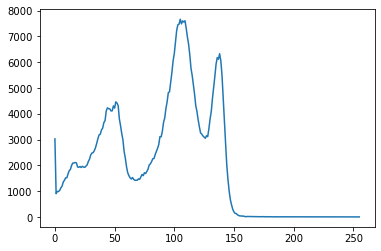

In [32]:
masked_img = cv2.bitwise_and(src1=golden_gate, src2=golden_gate, mask=mask)
masked_img_hist = cv2.calcHist(images=[golden_gate], channels=[0], mask=mask, histSize=[256], ranges=[0, 256])
plt.figure(), plt.plot(masked_img_hist);

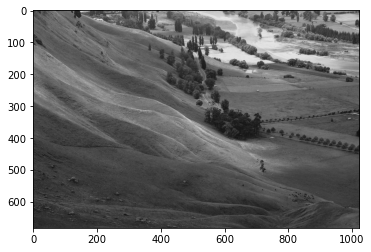

In [35]:
img = cv2.imread(filename='hist_equ.jpg', flags=0)
plt.figure(), plt.imshow(X=img, cmap='gray');

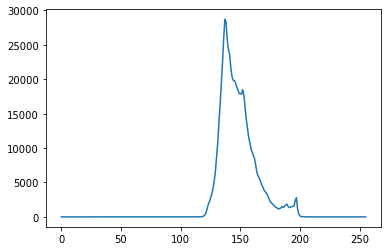

In [36]:
img_hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure(), plt.plot(img_hist);

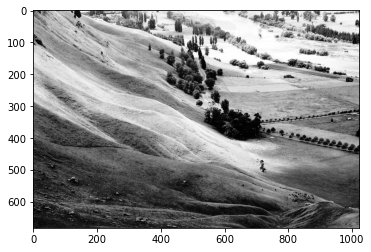

In [38]:
eq_hist = cv2.equalizeHist(img)
plt.figure(), plt.imshow(eq_hist, cmap='gray');

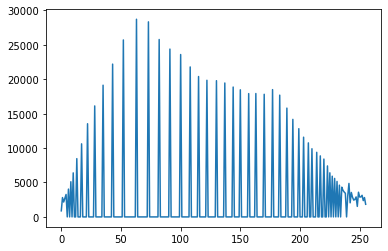

In [39]:
eq_img_hist = cv2.calcHist(images=[eq_hist], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure(), plt.plot(eq_img_hist);

## cv2.calcHist(images, channels, mask, histSize, ranges, hist, accumulate)
### Bu fonksiyon, bir görüntüdeki piksel yoğunluk dağılımını hesaplamak için kullanılan bir OpenCV fonksiyonudur. Bu işlem, görüntünün histogramını oluşturarak her piksel değeri için kaç tane pikselin bulunduğunu hesaplar.
### images: Hesaplanacak görüntü veya görüntülerin listesi. Birden fazla görüntü verilirse, histogramlar birleştirilerek hesaplanır.
### channels: Histoğramın hesaplanacağı kanalları belirten liste. Eğer görüntü gri tonlamalı ise '[0]' olarak belirtilir. Renkli bir görüntü ise '[0, 1, 2]' gibi bir liste kullanılır.
### mask (isteğe bağlı): Histoğramın hesaplanacağı bölgenin maske görüntüsü. Sadece belirli bir bölgeyi dikkate almak için kullanılır.
### histSize: Histoğramın boyutunu belirleyen liste. Her bir kanal için yoğunluk değerlerinin aralığındaki bölüm sayısını belirtir. Örneğin, '[256]' gri tonlamalı bir görüntü için 256 bölüm kullanılacağı gösterir.
### ranges: Yoğunluk değerlerinin aralığını belirleyen liste. Örneğin, gri tonlamalı bir görüntü için '[0, 256]' aralığında yoğunluk değerleri kullanılır.
### hist (isteğe bağlı): Hesaplanan histogramın çıktı olarak atanacağı değişken. Eğer belirtilmezse, fonksiyon tarafından otomatik olarak oluşturulur.
### accumulate (isteğe bağlı): Eğer 'True' olarak belirtilirse, daha önce hesaplanan histogram üzerine yeni değerler eklenir. Varsayılan değeri 'False' 'dur.

### cv2.calcHist() fonksiyonu, görüntünün piksel yoğunluğunu farklı aralıklarla analiz etmek ve histogramını oluşturmak için kullanılır. Elde edilen histogram, görüntünün genel kontrasto, parlaklığı ve dağılımı hakkında bilgi sağlar.

## cv2.bitwise_and(src1, src2, dst, mask)
### Bu fonksiyon, iki görüntü veya görüntüyle bir maske arasında bit düzeyinde bir 've' işlemi gerçekleştirir. Bu işlem, her iki görüntünün veya pikselin karşılık gelen bitlerinin 1 olduğu durumlarda yeni bir çıktı görüntüsü oluşturur.
### src1: İlk girdi görüntüsü veya matris.
### src2: İkinci girdi görüntüsü veya matris.
### dst (İsteğe Bağlı): Çıktı görüntüsü veya matris. Bu parametre belirtilmezse, fonksiyon tarafından otomatik olarak oluşturulur.
### mask (İsteğe Bağlı): Maske görüntüsü veya matrisi. Bu parametre belirtilirse, yalnızca maskenin 1 olduğu piksellerde işlem yapılır. Maske, src1 ve src2'nin aynı boyutta olmalıdır.

## cv2.equalizeHist(src, dst)
### Bu fonksiyon, bir görüntünün histogramını eşitleyerek görüntünün kontrastını artıran bir işlem gerçekleştirir. Bu işlem, görüntünün tüm piksel değerlerini analiz eder, piksel yoğunluklarını dengeler ve daha geniş bir tonlama aralığına dağıtır.
### src: Görüntü veya gri tonlamalı bir görüntü.
### dst (İsteğe Bağlı): Çıktı görüntüsü. Bu parametre belirtilmezse, fonksiyon tarafından otomatik olarak oluşturulur.